In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.metrics import log_loss

In [4]:
gatrain = pd.read_csv('./data/gender_age_train.csv')
gatest = pd.read_csv('./data/gender_age_test.csv')
gatrain.head(3)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


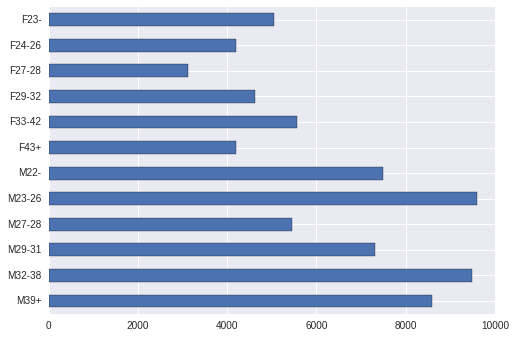

In [11]:
gatrain.group.value_counts().sort_index(ascending=False).plot(kind='barh')

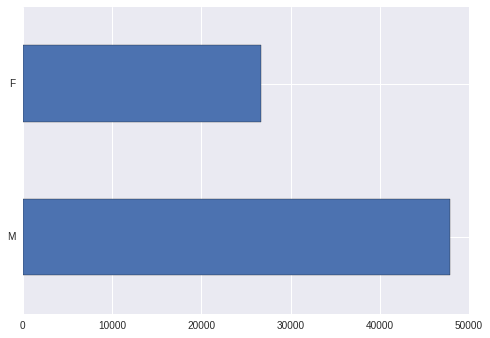

In [12]:
gatrain.gender.value_counts().plot(kind='barh')

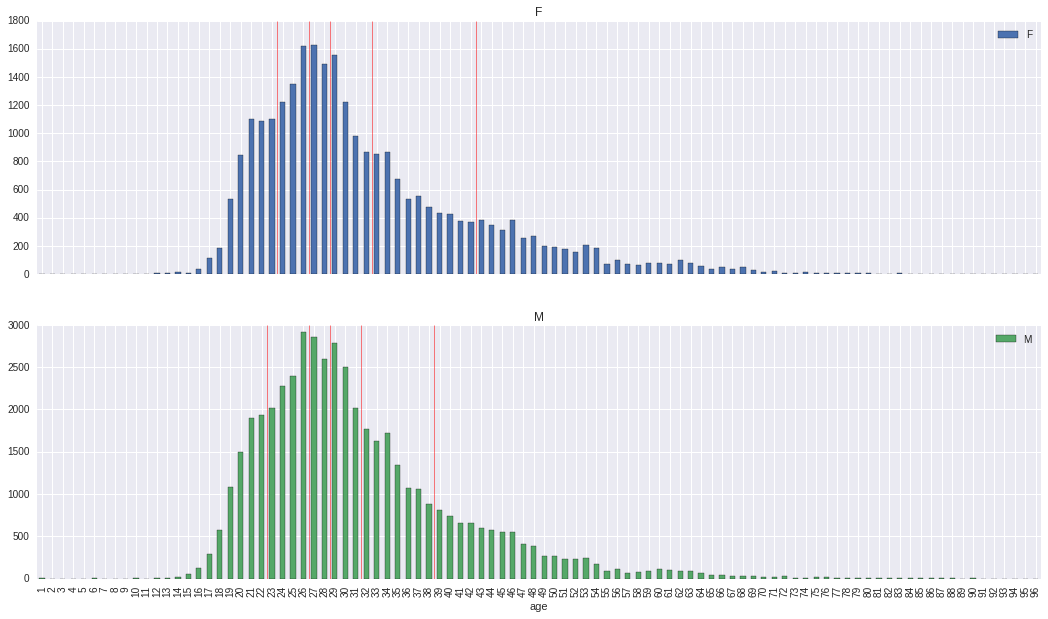

In [24]:
c = gatrain.groupby(['age','gender']).size().unstack().reindex(index=np.arange(gatrain.age.min(), 
                                                                               gatrain.age.max()+1)).fillna(0)


ax1, ax2 = c.plot(kind='bar',figsize=(18,10),subplots=True);
ax1.vlines(np.array([23,26,28,32,42])-0.5,0,1800,alpha=0.5,linewidth=1,color='r') #alpha for transparency
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

In [33]:
groupsize=gatrain.groupby('group').size()
prob = gatrain.groupby('group').size()/gatrain.shape[0]

In [36]:
letarget = LabelEncoder().fit(gatrain.group.values)
y = letarget.transform(gatrain.group.values)
n_classes = len(letarget.classes_)

# Class Probabilities

In [37]:
kf = KFold(gatrain.shape[0], n_folds=10, shuffle=True, random_state=0)
pred = np.zeros((gatrain.shape[0],n_classes))
for itrain, itest in kf:
    train = gatrain.iloc[itrain,:]
    test = gatrain.iloc[itest,:]
    ytrain, ytest = y[itrain], y[itest]
    prob = train.groupby('group').size()/train.shape[0]
    pred[itest,:] = prob.values
print(log_loss(y, pred))

2.42805122275


In [34]:
prob

group
F23-      0.067654
F24-26    0.056132
F27-28    0.041771
F29-32    0.062000
F33-42    0.074499
F43+      0.056186
M22-      0.100315
M23-26    0.128676
M27-28    0.072945
M29-31    0.097917
M32-38    0.126948
M39+      0.114957
dtype: float64